In [1]:
import tensorflow as tf
import numpy as np
import random
import os
from progressive_nn import InitialColumnProgNN

/home/deep3072/anaconda2/envs/tu36/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


In [2]:
def check_obj(obj_str):
    obj = eval(obj_str)
    obj_type = type(obj)
    print(obj_str
        , obj_type
        , end = ' '
        )
    if obj_type == np.ndarray:
        print(obj.shape)
    else:
        try:
            iterator = iter(obj)
        except TypeError:
            # not iterable
            print(obj)
        else:
            # iterable
            print(len(obj))

In [3]:
# session settings
mem_fraction = 0.25
gpu_options = tf.GPUOptions(
    allow_growth=True
#         ,per_process_gpu_memory_fraction=mem_fraction
    )
config = tf.ConfigProto(gpu_options=gpu_options)
session = tf.Session(config = config)
# seed settings
seed = int(os.getenv("SEED", 12))
tf.set_random_seed(seed)
np.random.seed(seed)
random.seed(seed)

X_data (300, 1) 
 [[-1.        ]
 [-0.99331105]
 [-0.9866221 ]
 [-0.9799331 ]
 [-0.97324413]]
y_data (300, 1) 
 [[0.5236493 ]
 [0.45259556]
 [0.48554516]
 [0.37523207]
 [0.48486125]]
FC_layer, shape_inputs = [None, 1]
FC_layer, shape_W = [1, 10] , shape_b = [1, 10]
FC_layer, shape_inputs = [None, 10]
FC_layer, shape_W = [10, 1] , shape_b = [1, 1]
Epoch 1 , step 0 , loss= 0.16340958 
Epoch 51 , step 0 , loss= 0.110968895 
Epoch 101 , step 0 , loss= 0.09359785 
Epoch 151 , step 0 , loss= 0.09150763 
Epoch 201 , step 0 , loss= 0.089835666 
Epoch 251 , step 0 , loss= 0.087196 
Epoch 301 , step 0 , loss= 0.08347666 
Epoch 351 , step 0 , loss= 0.078744136 
Epoch 401 , step 0 , loss= 0.07280296 
Epoch 451 , step 0 , loss= 0.06536231 
Epoch 501 , step 0 , loss= 0.056426283 
Epoch 551 , step 0 , loss= 0.046535965 
Epoch 601 , step 0 , loss= 0.036804233 
Epoch 651 , step 0 , loss= 0.028184894 
Epoch 701 , step 0 , loss= 0.021230588 
Epoch 751 , step 0 , loss= 0.016095104 
Epoch 801 , step 0 , lo

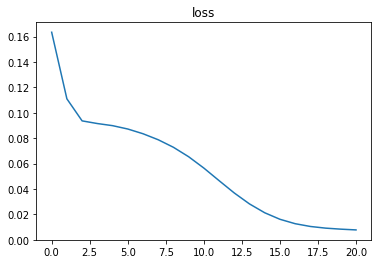

In [4]:
try_reg = True
if try_reg:
#         X_data = np.random.random((6000))[:, np.newaxis]*100
#         noise = np.random.normal(0, 0.05, X_data.shape).astype(np.float32)*0
#         y_data = X_data*2 + 1 + noise
    X_data = np.linspace(-1,1,300, dtype=np.float32)[:, np.newaxis]
    noise = np.random.normal(0, 0.05, X_data.shape).astype(np.float32)
    y_data = np.square(X_data) - 0.5 + noise
    print('X_data',X_data.shape,'\n',X_data[:5])
    print('y_data',y_data.shape,'\n',y_data[:5])

    input_dims = X_data.shape[1]
    col_0 = InitialColumnProgNN(
        input_dims=input_dims
        , output_dims=1
        , session=session
        , dtype_X=tf.float32, dtype_y=tf.float32
    )
    col_0.add_fc(10,activation_func=tf.nn.relu)
#     col_0.add_fc(1024,activation_func=tf.nn.relu)
    col_0.add_fc(1,activation_func=None
        # ,output_layer=True
        )
    col_0.compile_nn(
#         loss=tf.reduce_mean(tf.reduce_sum(tf.square(col_0.ys - col_0.prediction),reduction_indices=[1]))
        loss=tf.losses.mean_squared_error(col_0.ys,col_0.prediction)
        ,opt=tf.train.AdamOptimizer(learning_rate=1e-3)
#         ,opt=tf.train.GradientDescentOptimizer(learning_rate=1e-1)
#         ,mectrics=[]
    )
    col_0.train(
        X=X_data
        , y=y_data
        , batch_size=None
        , n_epochs=1000
        , display_steps=50
    )
    col_0.plt_loss()



In [ ]:
try_cls = True
if try_cls:
    from tensorflow.examples.tutorials.mnist import input_data

    mnist = input_data.read_data_sets("/tmp/data/", one_hot=True)
    X_train = mnist.train.images#.astype(np.float64)
    y_train = mnist.train.labels#.astype(np.float64)
    X_val = mnist.validation.images
    y_val = mnist.validation.labels
    X_test = mnist.test.images
    y_test = mnist.test.labels
    check_obj('X_train')
    check_obj('y_train')
    input_dims = X_train.shape[1]
    output_dims = y_train.shape[1]
    check_obj('input_dims')
    check_obj('output_dims')
    col_cls_0 = InitialColumnProgNN(
        input_dims=input_dims
        , output_dims=output_dims
        , session=session
        , dtype_X=tf.float32
        , dtype_y=tf.float32)
    col_cls_0.add_fc(512,activation_func=tf.nn.relu)
    col_cls_0.add_fc(256,activation_func=tf.nn.relu)
    col_cls_0.add_fc(128,activation_func=tf.nn.relu)
    col_cls_0.add_fc(output_dims,activation_func=tf.nn.softmax)
    col_cls_0.compile_nn(
        loss=tf.losses.softmax_cross_entropy(col_cls_0.ys,col_cls_0.logits)
        , opt=tf.train.AdamOptimizer(learning_rate=1e-3)
        , metrics = ['acc'])
    col_cls_0.train(
        X=X_train
        ,y=y_train
        ,val_set=[X_val,y_val]
        ,batch_size=256
        ,n_epochs=10
        ,display_steps=100)
    col_cls_0.plt_loss()